In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv(r"C:\Users\nirma\Desktop\AIML\projects\kaggle datasets\swiggy\swiggy_file.csv")
df.head()

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar


In [11]:
df.shape

(140657, 10)

In [12]:
df.columns

Index(['Restaurant Name', 'Cuisine', 'Rating', 'Number of Ratings',
       'Average Price', 'Number of Offers', 'Offer Name', 'Area', 'Pure Veg',
       'Location'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140657 entries, 0 to 140656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Restaurant Name    140657 non-null  object
 1   Cuisine            140630 non-null  object
 2   Rating             140657 non-null  object
 3   Number of Ratings  126115 non-null  object
 4   Average Price      140657 non-null  object
 5   Number of Offers   140657 non-null  int64 
 6   Offer Name         138849 non-null  object
 7   Area               140655 non-null  object
 8   Pure Veg           140657 non-null  object
 9   Location           140657 non-null  object
dtypes: int64(1), object(9)
memory usage: 10.7+ MB


In [14]:
df.describe()

,Number of Offers
count,140657.000000
mean,3.187890
std,1.583943
min,0.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [15]:
df.isnull().sum()

Restaurant Name          0
Cuisine                 27
Rating                   0
Number of Ratings    14542
Average Price            0
Number of Offers         0
Offer Name            1808
Area                     2
Pure Veg                 0
Location                 0
dtype: int64

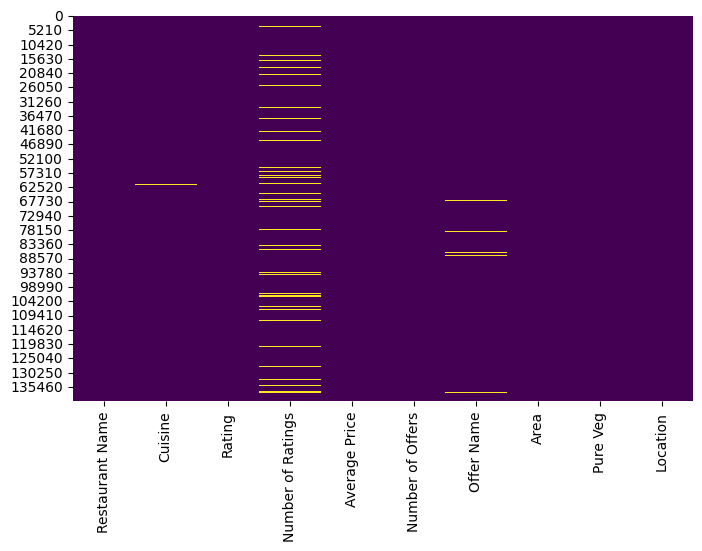

In [18]:
from matplotlib import rcParams

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
rcParams['figure.figsize'] = 10, 5

In [19]:
df.nunique()

Restaurant Name      100665
Cuisine                2133
Rating                   43
Number of Ratings        17
Average Price           501
Number of Offers          6
Offer Name            19367
Area                  16307
Pure Veg                  2
Location                581
dtype: int64

In [20]:
restaurant_counts = df.groupby('Area')['Restaurant Name'].count().reset_index()
restaurant_counts = restaurant_counts.sort_values(by='Restaurant Name', ascending=False)

top20_areas = restaurant_counts.head(20)

restaurant_counts = df.groupby('Location')['Restaurant Name'].count().reset_index()
restaurant_counts = restaurant_counts.sort_values(by='Restaurant Name', ascending=False)

top20_locations = restaurant_counts.head(20)

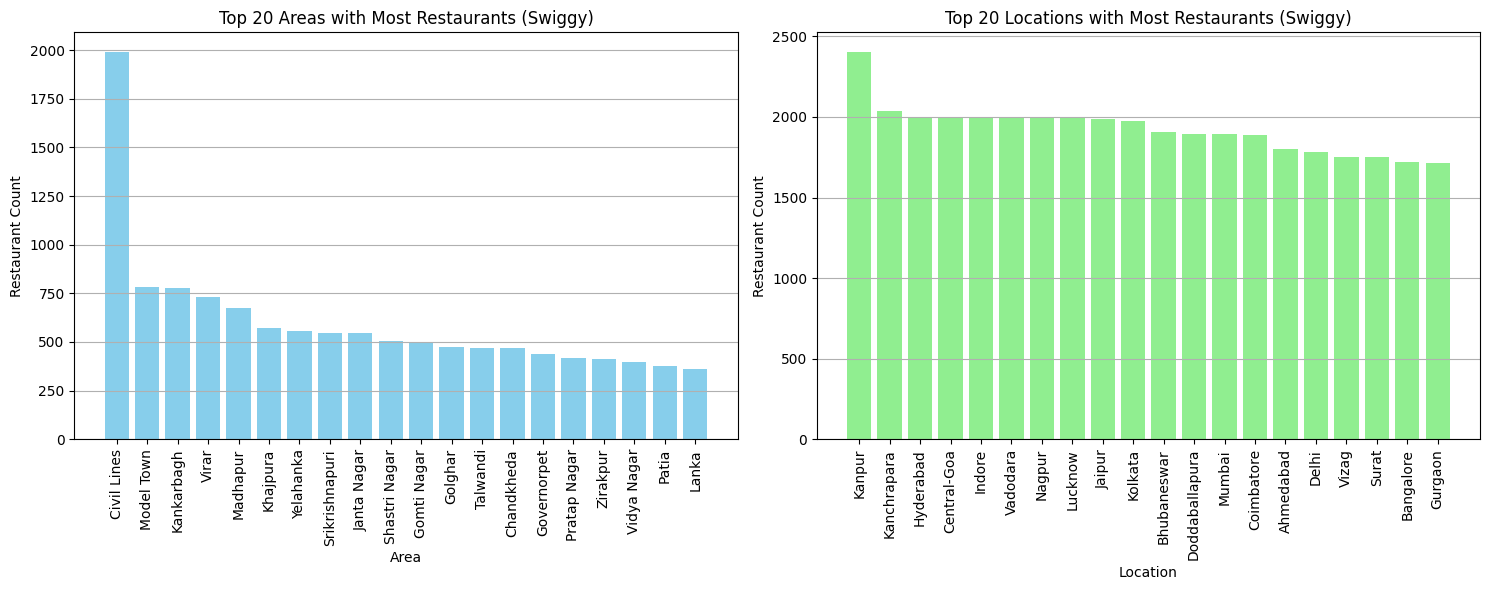

In [21]:
# Create a figure with two subplots arranged side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the bar plot for top 20 areas
axs[0].bar(top20_areas['Area'], top20_areas['Restaurant Name'], color='skyblue')
axs[0].set_xlabel('Area')
axs[0].set_ylabel('Restaurant Count')
axs[0].set_title('Top 20 Areas with Most Restaurants (Swiggy)')
axs[0].tick_params(axis='x', rotation=90)
axs[0].grid(axis='y')

# Plot the bar plot for top 20 locations
axs[1].bar(top20_locations['Location'], top20_locations['Restaurant Name'], color='lightgreen')
axs[1].set_xlabel('Location')
axs[1].set_ylabel('Restaurant Count')
axs[1].set_title('Top 20 Locations with Most Restaurants (Swiggy)')
axs[1].tick_params(axis='x', rotation=90)
axs[1].grid(axis='y')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [23]:
cuisine_count = df["Cuisine"].value_counts()

top10_cuisines = cuisine_count.head(10)

top10_cuisines

North Indian, Chinese    6641
Indian                   6480
Chinese                  3840
Indian, Chinese          3515
North Indian             3506
Bakery                   3387
Chinese, North Indian    3304
South Indian             2897
Biryani                  2410
Bakery, Desserts         2197
Name: Cuisine, dtype: int64

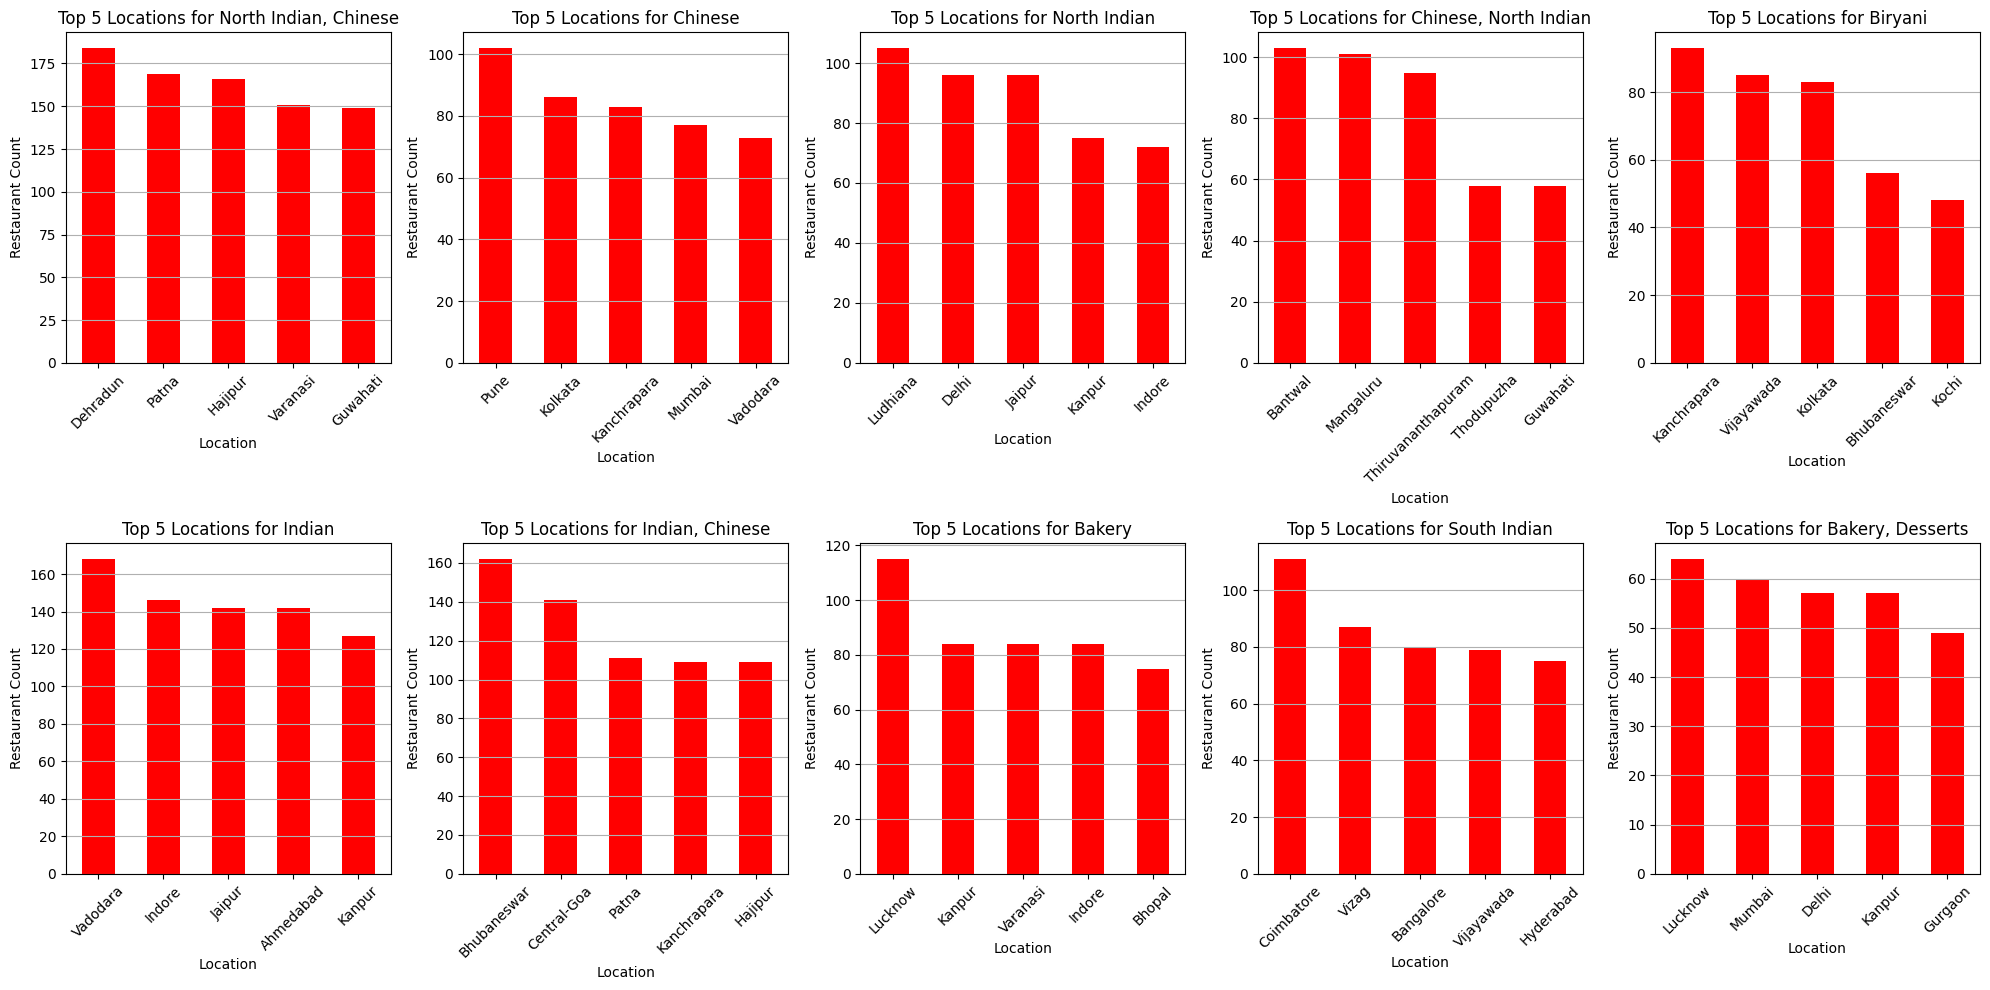

In [30]:
top5_locations_by_cuisine = {}

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

for i, cuisine in enumerate(top10_cuisines.index):
    cuisine_restaurants = df[df['Cuisine'] == cuisine]
    
    location_counts = cuisine_restaurants['Location'].value_counts()
    
    top5_locations = location_counts.head(5)
    
    top5_locations_by_cuisine[cuisine] = top5_locations
    
    ax = axs[i % 2, i // 2]
    top5_locations.plot(kind='bar', ax=ax, color='red')
    ax.set_title(f"Top 5 Locations for {cuisine}")
    ax.set_xlabel('Location')
    ax.set_ylabel('Restaurant Count')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [43]:
pureveg_counts = (df['Pure Veg'].value_counts()["Yes"])

total_restaurants = df['Restaurant Name'].count()

percent = (pureveg_counts / total_restaurants)*100

percent

42.06189524872562

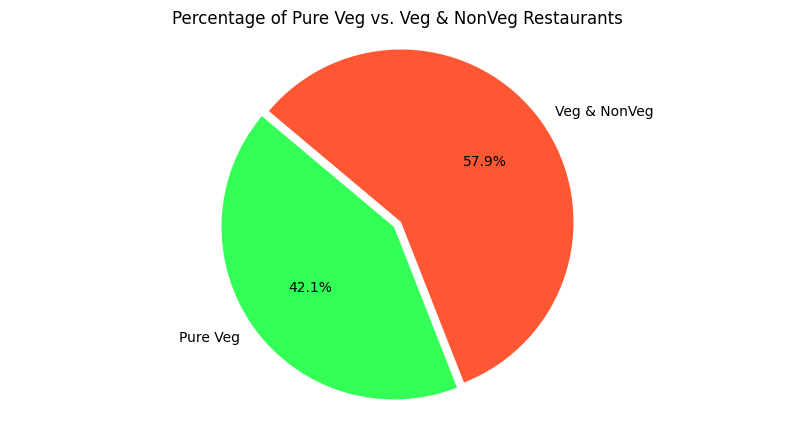

In [49]:
sizes = [percent, 100 - percent]

labels = ['Pure Veg', 'Veg & NonVeg']

colors = ['#33FF57', '#FF5733']

plt.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=140,
        colors=colors,
        explode=(0, 0.05))
plt.title('Percentage of Pure Veg vs. Veg & NonVeg Restaurants')
plt.axis('equal')
plt.show()